---

#### Loading The Datasets

Create a Pandas DataFrame every time you start the Jupyter notebook.

Dataset links (don't click on them):

1. Train dataset

   https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/kepler-exoplanets-dataset/exoTrain.csv

2. Test dataset

   https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/kepler-exoplanets-dataset/exoTest.csv

In [ ]:
# Load both the training and test datasets.
import numpy as np
import pandas as pd

exo_train_df = pd.read_csv('https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/kepler-exoplanets-dataset/exoTrain.csv')
exo_test_df = pd.read_csv('https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/kepler-exoplanets-dataset/exoTest.csv')

In [ ]:
# The shapes of the 'exo_train_df' and 'exo_test_df' DataFrames.
print(exo_train_df.shape)
exo_test_df.shape

(5087, 3198)


(570, 3198)

In the previous classes, we have already checked the datasets don't have a missing value. So, we can skip that part.

---

#### Data Normalisation

Normalise data using the mean normalisation method.

In [ ]:
# Function for mean normalisation.
def mean_normalise(series):
  norm_series = (series - series.mean()) / (series.max() - series.min())
  return norm_series

In [ ]:
# Applying the 'mean_normalise()' function horizontally on the training DataFrame.
norm_train_df = exo_train_df.iloc[:, 1:].apply(mean_normalise, axis=1)
norm_train_df.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,FLUX.40,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,0.053834,0.047391,0.006510,-0.023699,-0.031772,-0.086410,-0.093128,-0.068161,-0.057650,-0.109164,-0.139515,-0.105769,-0.117852,-0.100430,-0.083555,-0.072383,-0.069726,-0.037457,-0.061937,-0.006926,-0.022974,-0.049629,-0.029840,-0.062219,-0.069091,-0.090825,-0.092884,-0.126360,-0.163160,-0.151251,-0.153715,-0.169038,-0.099904,-0.099904,0.013165,-0.117647,-0.126739,-0.130153,-0.123659,-0.132148,...,-0.113989,-0.042873,-0.001536,0.017611,-0.058446,-0.019285,-0.025855,-0.212030,-0.212030,-0.191009,-0.231774,-0.051349,-0.131090,-0.074706,-0.015884,0.034122,0.077049,0.042656,0.078249,-0.130332,-0.130332,-0.063663,-0.017655,-0.017494,0.074220,0.037805,0.057786,-0.012547,-0.022679,-0.016981,-0.056482,-0.071934,-0.071934,0.009738,0.024779,0.052993,0.018843,0.033024,-0.003127,-0.031759
1,-0.050411,-0.042317,-0.081922,-0.052351,-0.115212,-0.104794,-0.126816,-0.124861,-0.122681,-0.105708,-0.126752,-0.108256,-0.105339,-0.126143,-0.110821,-0.086298,-0.047767,-0.065878,-0.037717,-0.001141,0.003026,0.037214,0.085169,0.028911,0.077075,0.038672,0.036236,0.031107,-0.314584,0.042567,0.042567,0.042567,0.042567,0.042567,0.039185,-0.001718,-0.010325,-0.034736,-0.043054,-0.027652,...,-0.046997,-0.012922,-0.009316,0.044699,0.009549,0.011264,0.056463,-0.081377,-0.081377,-0.103560,-0.081073,-0.037653,-0.009604,-0.010502,0.003202,0.025866,0.014790,0.070552,-0.003802,-0.019397,-0.019397,-0.027075,-0.026369,-0.041099,-0.002568,0.017916,0.030514,-0.008386,0.002786,0.031988,0.006648,-0.039721,-0.039721,-0.027988,0.004116,0.013124,-0.006847,0.022260,0.037550,0.043849
2,0.243983,0.245509,0.235186,0.227365,0.208538,0.212981,0.212283,0.222467,0.199285,0.221536,0.214684,0.211260,0.225183,0.201444,0.220969,0.220089,0.245225,0.254078,0.258014,0.247472,0.264313,0.252836,0.255171,0.252459,0.264773,0.257679,0.265071,0.243066,0.253580,0.246630,0.241438,0.243918,0.123501,0.123501,0.132215,0.135029,0.113722,0.104855,0.075933,0.100408,...,-0.027578,-0.019301,-0.032434,-0.045498,-0.035989,-0.044037,-0.069363,-0.042981,-0.042981,-0.045256,-0.029601,-0.032211,-0.017380,-0.033490,-0.030611,-0.002554,-0.018348,-0.025717,-0.006848,0.002703,0.002703,-0.015463,-0.020083,-0.018734,-0.011746,-0.016729,-0.000153,-0.036733,-0.033788,-0.042809,-0.037161,0.002382,0.002382,-0.017715,-0.013523,-0.001456,-0.009299,-0.017259,-0.036384,-0.048782
3,0.518501,0.551177,0.480659,0.474051,0.504754,0.496863,0.511941,0.494687,0.496425,0.513506,0.494421,0.517984,0.497505,0.498726,0.505099,0.525390,0.541329,0.571828,0.587031,0.586123,0.538041,0.533719,0.507212,0.510735,0.489536,0.472000,0.444632,0.439058,0.460806,0.447748,0.454073,0.448593,0.146229,0.146229,0.113287,0.123856,0.115839,0.127065,0.132937,0.117358,...,0.002969,0.029649,-0.014926,-0.032086,-0.013752,-0.015803,0.010782,-0.041371,-0.041371,-0.071432,-0.054131,-0.073091,-0.021737,0.004159,0.023605,0.004191,-0.016711,-0.029331,-0.036110,-0.049277,-0.049277,-0.017228,0.017656,0.023965,-0.006143,-0.005704,-0.027013,-0.033119,-0.039476,0.018892,0.016215,0.001435,0.001435,0.054324,0.038636,-0.012562,-0.006456,-0.019827,-0.019889,0.029163
4,-0.399904,-0.401872,-0.404199,-0.395473,-0.381734,-0.373293,-0.360070,-0.368986,-0.356861,-0.350022,-0.336272,-0.320243,-0.319939,-0.307239,-0.287833,-0.270844,-0.257219,-0.232375,-0.216411,-0.205402,-0.187

In [ ]:
# Inserting the 'LABEL' column to the 'norm_train_df' DataFrame.
norm_train_df.insert(loc=0, column='LABEL', value=exo_train_df['LABEL'])
norm_train_df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,0.053834,0.047391,0.006510,-0.023699,-0.031772,-0.086410,-0.093128,-0.068161,-0.057650,-0.109164,-0.139515,-0.105769,-0.117852,-0.100430,-0.083555,-0.072383,-0.069726,-0.037457,-0.061937,-0.006926,-0.022974,-0.049629,-0.029840,-0.062219,-0.069091,-0.090825,-0.092884,-0.126360,-0.163160,-0.151251,-0.153715,-0.169038,-0.099904,-0.099904,0.013165,-0.117647,-0.126739,-0.130153,-0.123659,...,-0.113989,-0.042873,-0.001536,0.017611,-0.058446,-0.019285,-0.025855,-0.212030,-0.212030,-0.191009,-0.231774,-0.051349,-0.131090,-0.074706,-0.015884,0.034122,0.077049,0.042656,0.078249,-0.130332,-0.130332,-0.063663,-0.017655,-0.017494,0.074220,0.037805,0.057786,-0.012547,-0.022679,-0.016981,-0.056482,-0.071934,-0.071934,0.009738,0.024779,0.052993,0.018843,0.033024,-0.003127,-0.031759
1,2,-0.050411,-0.042317,-0.081922,-0.052351,-0.115212,-0.104794,-0.126816,-0.124861,-0.122681,-0.105708,-0.126752,-0.108256,-0.105339,-0.126143,-0.110821,-0.086298,-0.047767,-0.065878,-0.037717,-0.001141,0.003026,0.037214,0.085169,0.028911,0.077075,0.038672,0.036236,0.031107,-0.314584,0.042567,0.042567,0.042567,0.042567,0.042567,0.039185,-0.001718,-0.010325,-0.034736,-0.043054,...,-0.046997,-0.012922,-0.009316,0.044699,0.009549,0.011264,0.056463,-0.081377,-0.081377,-0.103560,-0.081073,-0.037653,-0.009604,-0.010502,0.003202,0.025866,0.014790,0.070552,-0.003802,-0.019397,-0.019397,-0.027075,-0.026369,-0.041099,-0.002568,0.017916,0.030514,-0.008386,0.002786,0.031988,0.006648,-0.039721,-0.039721,-0.027988,0.004116,0.013124,-0.006847,0.022260,0.037550,0.043849
2,2,0.243983,0.245509,0.235186,0.227365,0.208538,0.212981,0.212283,0.222467,0.199285,0.221536,0.214684,0.211260,0.225183,0.201444,0.220969,0.220089,0.245225,0.254078,0.258014,0.247472,0.264313,0.252836,0.255171,0.252459,0.264773,0.257679,0.265071,0.243066,0.253580,0.246630,0.241438,0.243918,0.123501,0.123501,0.132215,0.135029,0.113722,0.104855,0.075933,...,-0.027578,-0.019301,-0.032434,-0.045498,-0.035989,-0.044037,-0.069363,-0.042981,-0.042981,-0.045256,-0.029601,-0.032211,-0.017380,-0.033490,-0.030611,-0.002554,-0.018348,-0.025717,-0.006848,0.002703,0.002703,-0.015463,-0.020083,-0.018734,-0.011746,-0.016729,-0.000153,-0.036733,-0.033788,-0.042809,-0.037161,0.002382,0.002382,-0.017715,-0.013523,-0.001456,-0.009299,-0.017259,-0.036384,-0.048782
3,2,0.518501,0.551177,0.480659,0.474051,0.504754,0.496863,0.511941,0.494687,0.496425,0.513506,0.494421,0.517984,0.497505,0.498726,0.505099,0.525390,0.541329,0.571828,0.587031,0.586123,0.538041,0.533719,0.507212,0.510735,0.489536,0.472000,0.444632,0.439058,0.460806,0.447748,0.454073,0.448593,0.146229,0.146229,0.113287,0.123856,0.115839,0.127065,0.132937,...,0.002969,0.029649,-0.014926,-0.032086,-0.013752,-0.015803,0.010782,-0.041371,-0.041371,-0.071432,-0.054131,-0.073091,-0.021737,0.004159,0.023605,0.004191,-0.016711,-0.029331,-0.036110,-0.049277,-0.049277,-0.017228,0.017656,0.023965,-0.006143,-0.005704,-0.027013,-0.033119,-0.039476,0.018892,0.016215,0.001435,0.001435,0.054324,0.038636,-0.012562,-0.006456,-0.019827,-0.019889,0.029163
4,2,-0.399904,-0.401872,-0.404199,-0.395473,-0.381734,-0.373293,-0.360070,-0.368986,-0.356861,-0.350022,-0.336272,-0.320243,-0.319939,-0.307239,-0.287833,-0.270844,-0.257219,-0.232375,-0.216411,-0.205402,-0.187382,-0.174118,-0.162633,-0.158

In [ ]:
# Applying the 'mean_normalise()' function on the testing DataFrame.
norm_test_df = exo_test_df.iloc[:, 1:].apply(mean_normalise, axis=1)
norm_test_df.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,FLUX.40,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,0.273347,0.228221,0.196676,0.110003,0.104130,0.088690,0.040926,0.014337,0.013534,-0.052079,-0.054832,-0.068804,-0.079655,-0.016015,-0.066188,-0.064169,-0.075732,-0.029872,-0.039691,-0.056415,-0.014730,0.019521,0.079812,0.184609,0.265570,0.305717,0.340084,0.397851,0.429097,0.492255,0.564521,-0.131709,-0.131709,-0.131709,-0.121087,-0.073988,-0.073140,-0.113012,-0.090988,-0.061462,...,-0.007527,0.026450,-0.017873,-0.055658,0.004151,0.067630,0.087497,-0.054121,-0.054121,-0.011702,0.003531,-0.039003,-0.072428,-0.018217,-0.011473,0.029524,0.034158,0.071645,0.112779,0.197754,0.197754,0.096949,0.110186,0.050676,0.073549,0.068892,0.031703,0.023376,0.050355,0.011882,0.031635,0.042578,0.031451,-0.005393,0.028904,0.102708,0.071576,0.080408,0.616438,0.130742
1,0.394038,0.391480,0.392680,0.390974,0.388955,0.386673,0.386340,0.382364,0.381035,0.374634,0.365595,0.355955,0.344779,0.326513,0.302050,0.288028,0.267479,0.245166,0.225696,0.204367,0.188959,0.166178,0.151080,0.129661,0.115564,0.104075,0.103383,0.102889,0.109362,0.131452,0.162766,0.195175,0.262094,0.262094,0.254659,0.234561,0.217038,0.197559,0.181571,0.166160,...,-0.249097,-0.321740,-0.356853,-0.260644,-0.169015,-0.194461,-0.203200,-0.047612,-0.047612,-0.059527,-0.082817,-0.103659,-0.128578,-0.147432,-0.171446,-0.182454,-0.195212,-0.200677,-0.197563,0.074878,0.074878,0.088953,0.093556,0.088384,0.073554,0.071405,0.043269,0.022604,-0.002679,-0.018935,-0.047311,-0.075404,-0.092643,-0.118456,-0.134109,-0.150638,-0.164944,-0.171944,-0.166961,-0.148790
2,0.648150,0.627582,0.591444,0.519002,0.466046,0.385214,0.340496,0.281192,0.162553,0.119260,0.069748,-0.010734,-0.022744,-0.045385,-0.006923,0.017249,-0.014986,0.051756,0.045126,0.053615,0.059758,0.081073,0.055856,0.015809,-0.007906,-0.107775,-0.171644,-0.239483,-0.306187,-0.338697,-0.107417,-0.107417,-0.107417,-0.107417,-0.122133,-0.102014,-0.068872,-0.013302,0.014956,0.056107,...,-0.022256,-0.048845,-0.022302,-0.038442,-0.052251,-0.083176,-0.002191,-0.024047,-0.024047,-0.023925,-0.074831,-0.072713,-0.077209,-0.079091,-0.091627,-0.125196,-0.085210,-0.020016,-0.048883,0.244109,0.244109,0.244109,0.118688,0.046208,0.014201,-0.097274,-0.054964,-0.035257,-0.001916,-0.010436,0.018179,-0.034769,-0.032201,-0.041117,-0.057967,-0.128412,-0.067972,-0.119374,-0.023437,0.027941
3,-0.232813,-0.233212,-0.238944,-0.235869,-0.208281,-0.220224,-0.222214,-0.208586,-0.197319,-0.188186,-0.196253,-0.200681,-0.173424,-0.181969,-0.185891,-0.183767,-0.184645,-0.182481,-0.186111,-0.177627,-0.188482,-0.170188,-0.154902,-0.142609,-0.145010,-0.157352,-0.143322,-0.143334,-0.130733,-0.128905,-0.111279,-0.097154,-0.081508,-0.068529,-0.067585,-0.071967,-0.063690,-0.062919,-0.044958,-0.036084,...,0.023932,-0.373173,-0.373173,-0.373173,-0.373173,-0.373173,-0.373173,-0.373173,-0.373173,0.014351,0.038435,0.021458,0.032712,0.049598,0.046797,0.033132,0.025102,0.028333,0.007686,0.008762,-0.002312,-0.044482,-0.066509,-0.084833,-0.083919,-0.062776,-0.055758,-0.051376,-0.020587,0.008095,0.056186,0.047254,0.047254,0.039873,0.021893,0.025227,0.025075,-0.017912,-0.059585,-0.046740
4,-0.006994,0.003426,0.006382,0.007610,0.003316,-0.000167,0.010016,-0.009471,0.008195,0.016842,0.001825,0.005384,-0.011494,0.021778,0.015523,0.011810,0.006193,0.016785,0.014291,0.024628,-0.002301,-0.002301,

In [ ]:
# Inserting the 'LABEL' column to the 'norm_test_df' DataFrame.
norm_test_df.insert(loc=0, column='LABEL', value=exo_test_df['LABEL'])
norm_test_df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,0.273347,0.228221,0.196676,0.110003,0.104130,0.088690,0.040926,0.014337,0.013534,-0.052079,-0.054832,-0.068804,-0.079655,-0.016015,-0.066188,-0.064169,-0.075732,-0.029872,-0.039691,-0.056415,-0.014730,0.019521,0.079812,0.184609,0.265570,0.305717,0.340084,0.397851,0.429097,0.492255,0.564521,-0.131709,-0.131709,-0.131709,-0.121087,-0.073988,-0.073140,-0.113012,-0.090988,...,-0.007527,0.026450,-0.017873,-0.055658,0.004151,0.067630,0.087497,-0.054121,-0.054121,-0.011702,0.003531,-0.039003,-0.072428,-0.018217,-0.011473,0.029524,0.034158,0.071645,0.112779,0.197754,0.197754,0.096949,0.110186,0.050676,0.073549,0.068892,0.031703,0.023376,0.050355,0.011882,0.031635,0.042578,0.031451,-0.005393,0.028904,0.102708,0.071576,0.080408,0.616438,0.130742
1,2,0.394038,0.391480,0.392680,0.390974,0.388955,0.386673,0.386340,0.382364,0.381035,0.374634,0.365595,0.355955,0.344779,0.326513,0.302050,0.288028,0.267479,0.245166,0.225696,0.204367,0.188959,0.166178,0.151080,0.129661,0.115564,0.104075,0.103383,0.102889,0.109362,0.131452,0.162766,0.195175,0.262094,0.262094,0.254659,0.234561,0.217038,0.197559,0.181571,...,-0.249097,-0.321740,-0.356853,-0.260644,-0.169015,-0.194461,-0.203200,-0.047612,-0.047612,-0.059527,-0.082817,-0.103659,-0.128578,-0.147432,-0.171446,-0.182454,-0.195212,-0.200677,-0.197563,0.074878,0.074878,0.088953,0.093556,0.088384,0.073554,0.071405,0.043269,0.022604,-0.002679,-0.018935,-0.047311,-0.075404,-0.092643,-0.118456,-0.134109,-0.150638,-0.164944,-0.171944,-0.166961,-0.148790
2,2,0.648150,0.627582,0.591444,0.519002,0.466046,0.385214,0.340496,0.281192,0.162553,0.119260,0.069748,-0.010734,-0.022744,-0.045385,-0.006923,0.017249,-0.014986,0.051756,0.045126,0.053615,0.059758,0.081073,0.055856,0.015809,-0.007906,-0.107775,-0.171644,-0.239483,-0.306187,-0.338697,-0.107417,-0.107417,-0.107417,-0.107417,-0.122133,-0.102014,-0.068872,-0.013302,0.014956,...,-0.022256,-0.048845,-0.022302,-0.038442,-0.052251,-0.083176,-0.002191,-0.024047,-0.024047,-0.023925,-0.074831,-0.072713,-0.077209,-0.079091,-0.091627,-0.125196,-0.085210,-0.020016,-0.048883,0.244109,0.244109,0.244109,0.118688,0.046208,0.014201,-0.097274,-0.054964,-0.035257,-0.001916,-0.010436,0.018179,-0.034769,-0.032201,-0.041117,-0.057967,-0.128412,-0.067972,-0.119374,-0.023437,0.027941
3,2,-0.232813,-0.233212,-0.238944,-0.235869,-0.208281,-0.220224,-0.222214,-0.208586,-0.197319,-0.188186,-0.196253,-0.200681,-0.173424,-0.181969,-0.185891,-0.183767,-0.184645,-0.182481,-0.186111,-0.177627,-0.188482,-0.170188,-0.154902,-0.142609,-0.145010,-0.157352,-0.143322,-0.143334,-0.130733,-0.128905,-0.111279,-0.097154,-0.081508,-0.068529,-0.067585,-0.071967,-0.063690,-0.062919,-0.044958,...,0.023932,-0.373173,-0.373173,-0.373173,-0.373173,-0.373173,-0.373173,-0.373173,-0.373173,0.014351,0.038435,0.021458,0.032712,0.049598,0.046797,0.033132,0.025102,0.028333,0.007686,0.008762,-0.002312,-0.044482,-0.066509,-0.084833,-0.083919,-0.062776,-0.055758,-0.051376,-0.020587,0.008095,0.056186,0.047254,0.047254,0.039873,0.021893,0.025227,0.025075,-0.017912,-0.059585,-0.046740
4,2,-0.006994,0.003426,0.006382,0.007610,0.003316,-0.000167,0.010016,-0.009471,0.008195,0.016842,0.001825,0.005384,-0.011494,0.021778,0.015523,0.011810,0.006193,0.016785,0.014291,0.024628,-0.002301,-0.002301,0.004214,-0.003167,0.002058,-0

---

#### Transpose Of A DataFrame


In [ ]:
# Transpose the 'exo_train_df' using the 'T' keyword.
exo_train_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,5047,5048,5049,5050,5051,5052,5053,5054,5055,5056,5057,5058,5059,5060,5061,5062,5063,5064,5065,5066,5067,5068,5069,5070,5071,5072,5073,5074,5075,5076,5077,5078,5079,5080,5081,5082,5083,5084,5085,5086
LABEL,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
FLUX.1,93.85,-38.88,532.64,326.52,-1107.21,211.10,9.34,238.77,-103.54,-265.91,118.81,-239.88,70.34,424.14,-267.21,35.92,-122.30,-65.20,-66.47,560.19,-1831.31,2053.62,-48.48,145.84,207.37,304.50,150725.80,124.39,-63.50,31.29,-472.50,194.82,26.96,43.07,-248.23,22.82,26.24,-141.22,-35.62,142.40,...,3.26,5.52,223.80,-2.53,307.00,-354.25,2.10,9.27,-863.62,75.06,6.59,28.79,-83.00,9.80,89.83,159.78,11.50,-29.79,-188.62,4.67,15.62,-20.35,-2.30,3.15,462.33,-6.91,122.63,-1090.87,2.13,5.74,125.57,7.45,475.61,-46.63,299.41,-91.91,989.75,273.39,3.82,323.28
FLUX.2,83.81,-33.83,535.92,347.39,-1112.59,163.57,49.96,262.16,-118.97,-318.59,110.97,-164.28,63.86,407.71,-239.11,45.84,-122.30,-76.33,-15.50,262.94,-1781.44,2126.05,-22.95,137.82,195.04,275.94,129578.36,72.73,-49.15,25.14,-384.09,162.51,38.98,46.73,-243.59,46.37,42.32,-81.79,-28.55,137.03,...,4.11,9.28,223.44,-3.69,289.28,-347.10,9.26,8.92,-595.75,67.38,8.80,27.16,-78.50,21.49,79.95,160.60,8.02,-25.91,-214.18,-1.77,-25.58,-26.38,-11.70,1.68,383.22,-14.21,137.56,-1168.93,1.87,2.19,78.69,10.02,395.50,-55.39,302.77,-92.97,891.01,278.00,2.09,306.36
FLUX.3,20.10,-58.54,513.73,302.35,-1118.95,179.16,33.30,277.80,-108.93,-335.66,79.53,-180.91,58.37,461.59,-233.15,47.99,-131.08,-76.23,-44.59,189.94,-1930.84,2146.33,11.15,96.99,150.45,269.24,102184.98,36.85,-45.99,36.93,-330.42,126.17,25.99,29.43,-217.91,39.61,28.34,-52.28,-27.29,93.65,...,2.25,2.71,217.67,-1.26,191.08,-325.74,1.24,3.91,-425.25,33.94,-3.65,22.20,-83.66,16.65,81.44,186.23,-0.59,-25.00,-233.90,-2.53,-30.91,-21.92,-13.75,-4.79,342.29,0.10,109.06,-1154.31,-4.16,8.66,98.29,6.87,423.61,-64.88,278.68,-78.76,908.53,261.73,-3.29,293.16
FLUX.4,-26.98,-40.09,496.92,298.13,-1095.10,187.82,9.63,190.16,-72.25,-450.47,114.25,-225.69,69.43,428.17,-211.84,74.58,-109.69,-72.58,-49.03,185.12,-2016.72,2159.84,-70.04,17.09,135.34,248.51,82253.98,-4.68,-34.55,16.63,-273.41,129.70,47.28,9.75,-190.69,98.75,24.81,-32.45,-28.94,105.64,...,10.67,15.27,217.86,0.04,181.02,-310.49,6.34,4.28,-369.25,63.81,-11.99,19.47,-77.41,13.00,81.62,179.39,7.03,-25.09,-282.53,-3.44,-41.41,15.82,-6.37,-0.52,257.18,-13.02,135.08,-991.00,0.87,5.31,91.16,-2.82,376.36,-88.75,263.48,-97.33,851.83,236.99,-2.88,287.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FLUX.3193,92.54,0.76,5.06,-12.67,-438.54,19.27,-0.44,95.30,4.53,3162.53,126.14,-215.94,-10.79,138.38,-746.83,20.43,-54.25,31.26,-32.75,-165.00,326.61,2292.64,-4.93,127.98,19.46,-10.73,-13056.11,56.43,-90.38,4.79,-3410.42,-14.98,13.04,13.40,198.05,-5.38,8.49,38.66,-26.96,-39.64,...,-3.61,10.37,-36.74,6.49,7.74,164.87,1.90,-1.87,2918.12,-26.43,11.95,0.30,-58.89,15.28,85.77,-82.07,28.74,13.97,0.63,-13.11,33.58,2.67,1.31,-2.90,11.90,-10.60,-184.60,-488.62,-2.64,6.64,210.09,8.75,163.02,28.82,-74.95,151.75,-136.16,-3.47,-1.50,-25.33
FLUX.3194,39.32,-11.70,-11.80,-8.77,-399.71,-43.90,10.90,48.86,21.95,3398.28,200.36,-293.25,-4.97,190.66,-765.22,22.40,-37.13,21.71,-30.28,7.38,481.28,2454.48,26.74,67.51,9.32,3.49,379.48,-1.95,-74.36,13.26,-3

---

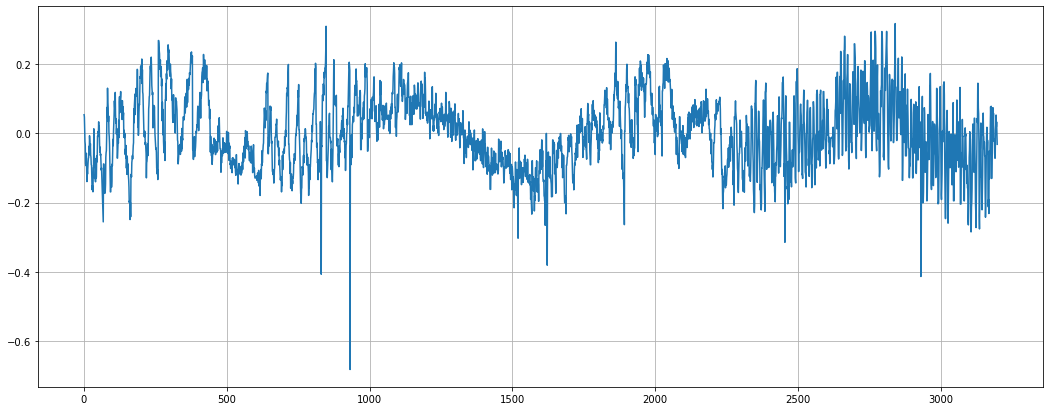

In [ ]:
#Create a line plot for the first star in the 'norm_train_df' DataFrame.
import numpy as np
import matplotlib.pyplot as plt

star_0 = norm_train_df.iloc[0, 1:]
star_0.head()

plt.figure(figsize = (18, 7))
plt.plot(np.arange(1, 3198), star_0)
plt.grid()
plt.show()

So there is a clear fluctuation in the `FLUX` values which drops,

- whenever a planet comes between its star and the Kepler telescope while orbiting the star and

- whenever the planet goes behind the star (as observed by Kepler telescope) while orbiting the star

To visualise the phenomenon described above, watch a video by clicking on the link provided in the **Activities** section under the title **Transiting Exoplanet Light Curve**.

These fluctuations occur after every fixed interval as you might have noticed. When the planet completes one revolution around the star, one cycle completes. This cycle repeats after a fixed time interval. E.g., Earth completes one revolution around the Sun in approximately 365.25 days so Earth's one cycle is 365.25 days long which repeats again and again.

The length of one cycle (in the unit of time) is called frequency. It is calculated as

$$f = \frac{1}{T}$$

where
$T$
is time in seconds. The SI unit of frequency is **Hertz** denoted as **Hz**.

So, the Earth's frequency is the reciprocal of
$365.25$
days, i.e.,

$$f_{\text{Earth}} = \frac{1}{365.25} $$

$$f_{\text{Earth}}= \frac{1}{365.25 \times 24 \times 60 \times 60} \space \text{Hz}$$

$[ \because 1 \space \text{day}  = 24 \times 60 \times 60 = 86400 \space \text{seconds} ]$

In a nutshell, we can compute the time-period of revolution (or cycle or frequency) of a planet around its star using the periodic variation in the flux values. The length of the period (or the length of one cycle) is the frequency of revolution of a planet around its star.

**Why do we need to apply Fourier Transformation?**

The Fourier transformation converts time-dependent data into frequency-dependent data.

<img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/lesson-17/fft_example.png' width=600>

*Image credits: https://www.mathworks.com/help/fixedpoint/examples/convert-fast-fourier-transform-fft-to-fixed-point.html*

As you can see in the images above, first, we have a time-dependent data that is later converted into a frequency-dependent data. In the *Magnitude vs Frequency* graph, you can notice the peaks are located at the
$f = 0.2, 0.5, 3.55$
and
$3.8$
points on the frequency axis.

Similarly, we can get the frequencies of the planets revolving around its star. Our predict model (Random Forest Classifier) can capture these frequencies while learning from the training data. Thus, allowing the prediction model to make accurate predictions.

Let's go through one simple example of a very clear periodic variation.

Refer to the code below. Ignore the code for the time being. Just observe the line graph that plots
$y$
vs
$x$.



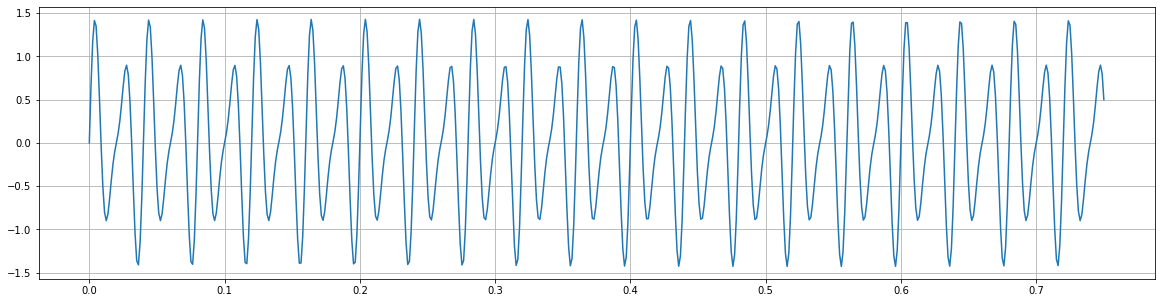

In [ ]:
#Run this code to make a line plot between the 'x' and 'y' values.
import numpy as np
import matplotlib.pyplot as plt

N = 600 # Number of sample points
T = 1.0 / 800.0 # sample spacing

t = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0 * np.pi * t) + 0.5 * np.sin(75.0 * 2.0 * np.pi * t)

plt.figure(figsize=(20, 5))
plt.plot(t, y)
plt.grid()
plt.show()

As you can see, the graph has a clear periodic variation. So, it must also have a frequency.


**The theory below is meant ONLY for the**
$12^{\text{th}}$
**and above standard student w.r.t. the NCERT Physics syllabus**

The above graph represents the sinusoidal wave having the equation
$$y = \sin((50 \times 2 \pi)t) + 0.5 \sin((75 \times 2 \pi)t)$$

where
$t$
is time.

So, the above sinusoidal wave is a linear combination of two sinusoidal waves having the equations

$$ y_1 = \sin((50 \times 2 \pi)t) \space \text{and} \\
y_2 = 0.5 \sin((75 \times 2\pi)t)
$$

A general equation of sinusoidal wave is given by
$$y = A \sin((2\pi f)t + \phi)$$

where
$A$
is amplitude,
$f$
is frequency and
$\phi$
is phase difference.

So, on comparing the two sinusoidal waves,
$y_1 \text{and} y_2$
with the general equation of a sinusoidal wave, we get

$$f_{1} = 50 \space \text{Hz} \space \text{and} \\
f_2= 75 \space \text{Hz}$$

Hence, the resulting sinusoidal wave has a combined frequency of 50 Hz and 75 Hz which should reflect in the frequency-dependent graph.


The code below applies Fourier transformation on the values stored in the `y` variable using the `fft.fft()` function which exists in the NumPy module. The transformed values are stored in the `yf` variable.

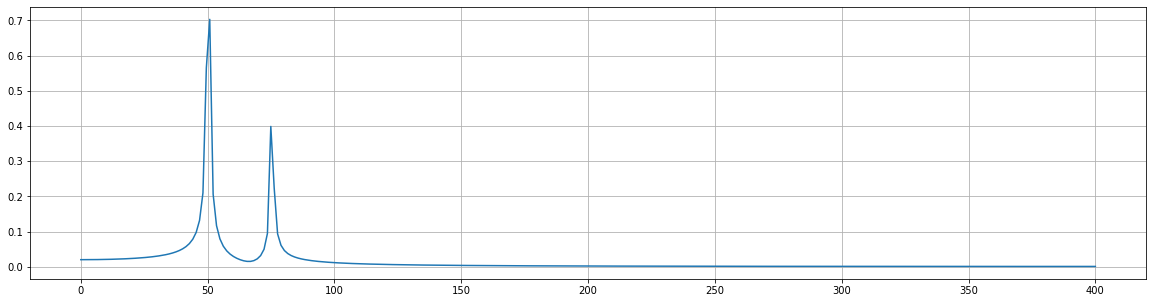

In [ ]:
#Run this code to make a line plot between the 'xf' and 'yf' values.
yf = np.fft.fft(y)
tf = np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.figure(figsize=(20, 5))
plt.plot(tf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

As you can see, there are two peaks at the numbers `50` and `75` on the
$x-axis.$
These two values are frequencies. This means the object whose periodic motion described by the equation `y = np.sin(50.0 * 2.0 * np.pi * t) + 0.5 * np.sin(75.0 * 2.0 * np.pi * x)` oscillates with a combined frequency of `50` Hz and `75`Hz.


---

In [ ]:
#Apply the 'fft.fft()' function on the 'star_0' Pandas series.
fft_star_0 = np.abs(np.fft.fft(star_0))
print(fft_star_0)

[6.62011616e-14 2.27324760e+00 3.57228832e+01 ... 3.39782358e+01
 3.57228832e+01 2.27324760e+00]


The `fft.fft()` function returns an array of the transformed values. Note that we have applied another function too. It's `abs()` to get the absolute values of the values stored in the array.

**The Absolute Value**

The absolute values are usually calculated when the transformed values (after applying Fourier transformation) turn out to be complex numbers. A complex number is a combination of a real number and an imaginary number. E.g.,
$2 + 3j \left( \text{where} \space j = \sqrt{-1} \right)$
is a complex number because
$2$
is a real number and
$3j$
is an imaginary number. A multiple of
$\sqrt{-1}$
is an imaginary number.

The absolute value of the complex number
$(2 + 3j)$ is $\sqrt{2^2 + 3^2} = \sqrt{13} = 3.605$


In [ ]:
#Calculate the absolute value of the complex number, z = 2 + 3j.
np.abs(2 + 3.5898989843)

5.5898989842999995

For a general complex number,
$$z = a+bj$$
the absolute value is calculated as
$$|z| = \sqrt{a^2 + b^2}$$

where
$a, b$
are some real numbers and
$j = \sqrt{-1}$

The
$\sqrt{-1}$
is called **iota** and is often represented as
$i = \sqrt{-1}$
in many Math textbooks.

A complex number cannot be plotted on a real number line because it contains an imaginary part. Contrary to its name, a complex number reduces the complexity of calculations, especially in the problems related to geometry.  


Now, let's find out the frequencies for the `star_0` Pandas series.

In [ ]:
#Apply the 'fft.fftfreq()' function on 'len(star_0)' to get the frequencies of the 'star_0' Pandas series.
f1 = np.fft.fftfreq(len(star_0))
f1

array([ 0.        ,  0.00031279,  0.00062559, ..., -0.00093838,
       -0.00062559, -0.00031279])

Note that the frequency array will be the same for all the stars because it depends on the length of the array/series. All the stars have the same array/series length.

Now, let's plot the Fourier transformed values with the frequency values for the `star_0` Pandas series.

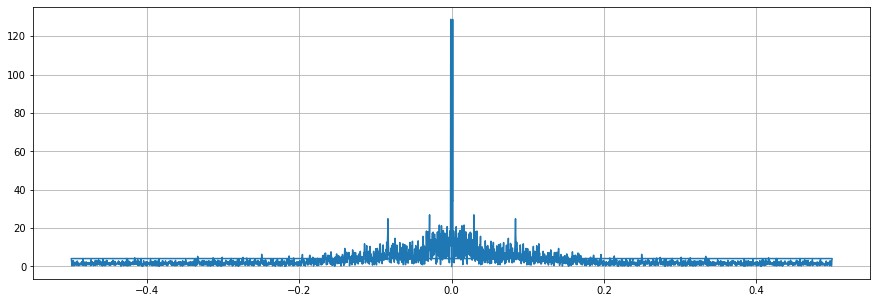

In [ ]:
#Create a line plot between the 'fft_star_0' and 'freq' values.
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (15,5))
plt.plot(f1,fft_star_0)
plt.grid()
plt.show()

The 5 tall peaks in the above graph:

1. At `-0.08` (approx)

2. At `-0.03` (approx)

3. At `-0.00`

4. At `0.03` (approx)

4. At `0.08` (approx)

Notice that the above plot is symmetric. So, either we can consider the left-half of the graph or the right-half. They both mean the same thing. Also, there is a huge spike close to `0`. It denotes that `star_0` has a frequency very close to `0`. If we plot the above graph for the first 10 values only, then we will be able to observe the peak very closely.

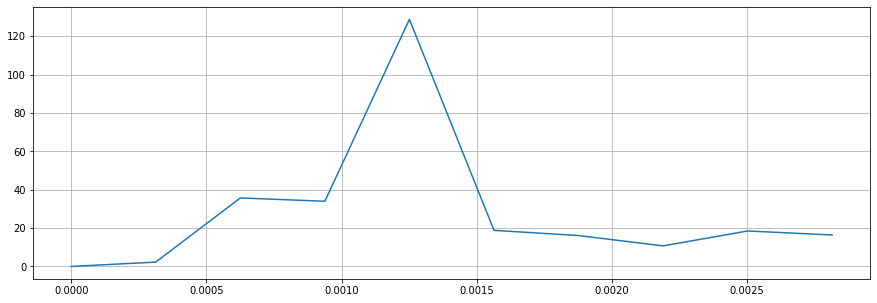

In [ ]:
#Plot a line plot between the 'fft_star_0' and 'freq' values for the first 10 values only.

plt.figure(figsize = (15,5))
plt.plot(f1[0:10],fft_star_0[0:10])
plt.grid()
plt.show()

As you can see, the peak lies at some point between `0.001` and `0.0015`, i.e. at `0.00125`.

Now, let's apply the Fourier Transformation on the entire `exo_train_df` dataset. For this purpose, we will have to create a function to apply the `fft.fft()` function on an entire DataFrame using the `apply()` function.

Let's name it `fast_fourier_transform()`. It should do two actions:

1. Transform a Pandas series using the `fft.fft()` function.

2. Calculate the absolute value of each item in the series.

In [ ]:
#Create a function and name it 'fast_fourier_transformation()' to apply Fast Fourier Transformation on the DataFrames.
def fftr(star):
  fftstar = np.fft.fft(star,len(star))
  return np.abs(fftstar)

This time we will apply the `fast_fourier_transform()` function vertically. So, before applying the function, we will take the transpose of the original DataFrame. Then, we will apply the `fast_fourier_transform()` function vertically. Then, we will again take the transpose of the DataFrame.

**Note:** We don't want to transform the `LABEL` values. We want to transform the `FLUX` values only.

In [ ]:
x_train_T = norm_train_df.iloc[: , 1:].T.apply(fftr , axis = 0)
x_train_fft = x_train_T.T
x_train_fft.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,FLUX.40,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,6.620116e-14,2.273248,35.722883,33.978236,128.816503,18.835061,16.101795,10.722037,18.488302,16.400976,1.920231,5.321160,11.332751,6.680037,12.021094,14.088651,15.247360,5.173820,7.720623,20.745046,8.957348,8.426093,14.832986,7.311026,9.442441,4.474428,5.662394,6.465002,4.272602,17.368854,8.195466,16.288997,4.299609,15.333522,8.889678,18.761014,13.248540,8.437022,11.048989,3.385416,...,11.958605,3.385416,11.048989,8.437022,13.248540,18.761014,8.889678,15.333522,4.299609,16.288997,8.195466,17.368854,4.272602,6.465002,5.662394,4.474428,9.442441,7.311026,14.832986,8.426093,8.957348,20.745046,7.720623,5.173820,15.247360,14.088651,12.021094,6.680037,11.332751,5.321160,1.920231,16.400976,18.488302,10.722037,16.101795,18.835061,128.816503,33.978236,35.722883,2.273248
1,4.821195e-14,30.299298,36.918808,38.376852,22.149931,33.282191,27.734204,11.862346,14.001221,14.221386,11.833992,13.256442,22.154585,13.553211,3.327314,14.056952,13.573917,9.102587,3.219534,7.289829,10.138438,6.733645,6.014359,29.899029,7.021179,8.345850,9.223856,11.485134,6.619756,13.554248,10.746137,7.591089,10.586435,7.877721,16.937570,4.360804,14.451814,8.484486,4.158838,6.130695,...,4.163371,6.130695,4.158838,8.484486,14.451814,4.360804,16.937570,7.877721,10.586435,7.591089,10.746137,13.554248,6.619756,11.485134,9.223856,8.345850,7.021179,29.899029,6.014359,6.733645,10.138438,7.289829,3.219534,9.102587,13.573917,14.056952,3.327314,13.553211,22.154585,13.256442,11.833992,14.221386,14.001221,11.862346,27.734204,33.282191,22.149931,38.376852,36.918808,30.299298
2,1.291464e-13,66.809870,19.498262,170.268810,48.413391,88.178733,57.407061,38.684283,10.503268,46.482585,22.681374,24.550247,16.277366,21.399836,21.978472,12.904352,21.021073,18.612100,8.887754,8.675205,14.092483,32.820582,13.151606,28.759359,14.533386,19.828422,21.486217,1.485398,12.608620,16.767271,16.029881,28.171315,14.046708,14.774095,22.184914,9.713089,21.081219,15.966226,4.523967,6.003082,...,14.722225,6.003082,4.523967,15.966226,21.081219,9.713089,22.184914,14.774095,14.046708,28.171315,16.029881,16.767271,12.608620,1.485398,21.486217,19.828422,14.533386,28.759359,13.151606,32.820582,14.092483,8.675205,8.887754,18.612100,21.021073,12.904352,21.978472,21.399836,16.277366,24.550247,22.681374,46.482585,10.503268,38.684283,57.407061,88.178733,48.413391,170.268810,19.498262,66.809870
3,2.498890e-14,19.369720,52.151962,108.097894,100.659024,269.416639,77.435861,71.256558,54.895479,33.335462,26.711804,31.754398,29.333060,24.021821,20.028949,24.799067,16.767433,19.513944,15.086840,14.070603,14.614616,10.716536,23.565979,15.180847,24.029569,17.296588,11.314895,10.407730,16.699691,7.168869,20.996939,14.448535,12.479272,16.166933,4.467943,11.777103,9.116722,4.873629,6.037218,10.522783,...,4.850993,10.522783,6.037218,4.873629,9.116722,11.777103,4.467943,16.166933,12.479272,14.448535,20.996939,7.168869,16.699691,10.407730,11.314895,17.296588,24.029569,15.180847,23.565979,10.716536,14.614616,14.070603,15.086840,19.513944,16.767433,24.799067,20.028949,24.021821,29.333060,31.754398,26.711804,33.335462,54.895479,71.256558,77.435861,269.416639,100.659024,108.097894,52.151962,19.369720
4,6.706859e-14,113.576655,51.382781,146.597215,148.627668,103.842855,116.738548,28.957862,36.451207,69.375686,4.923027,10.500032,7.8

---

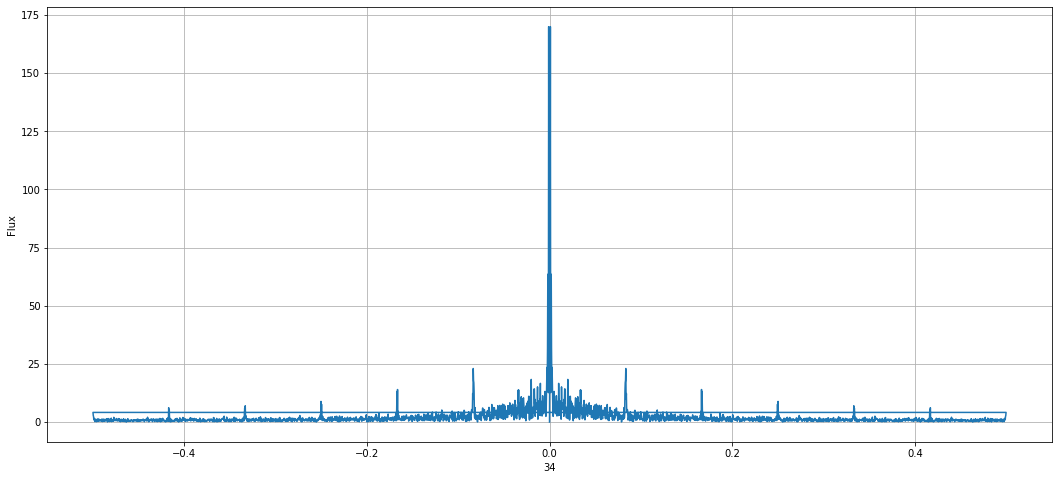

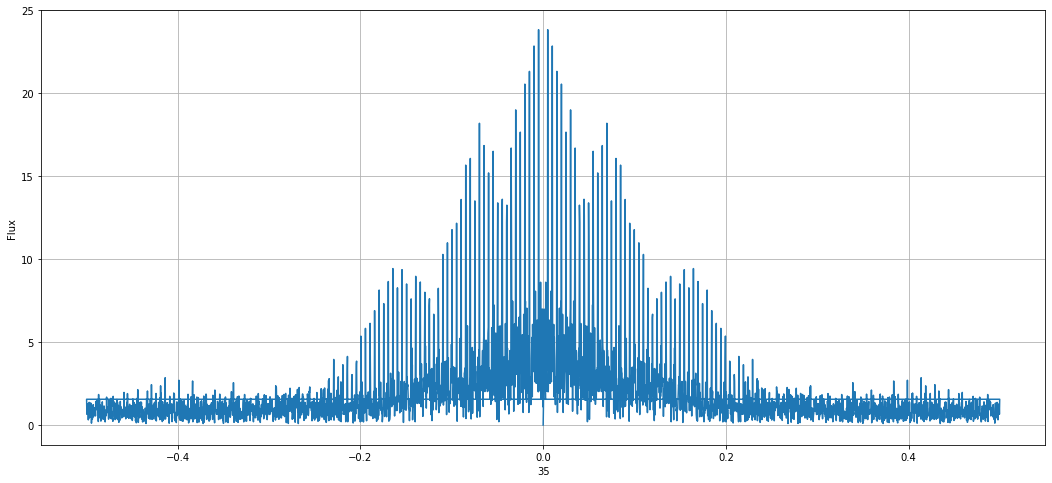

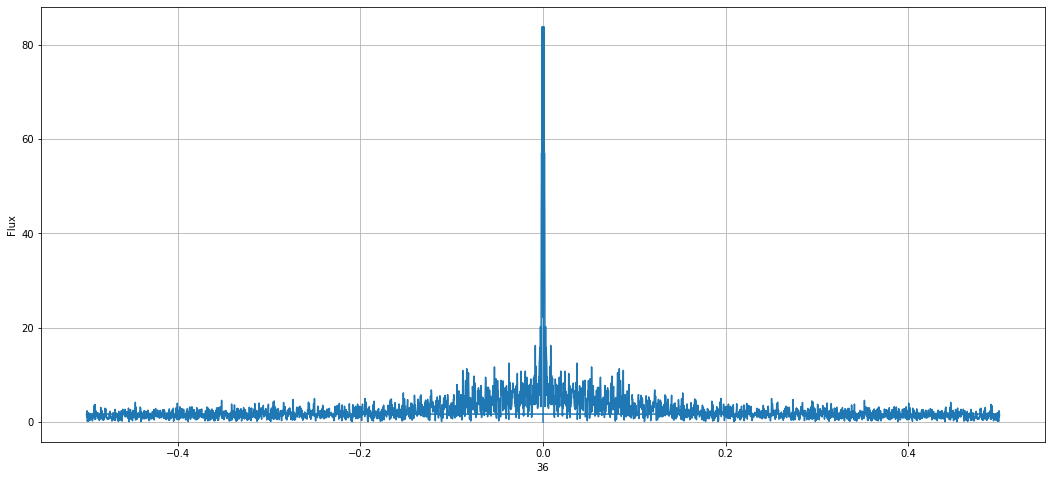

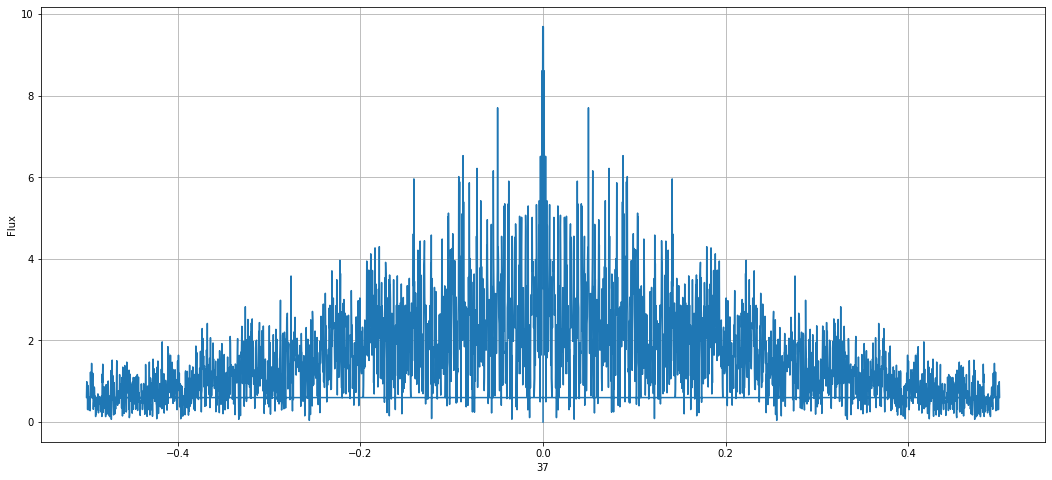

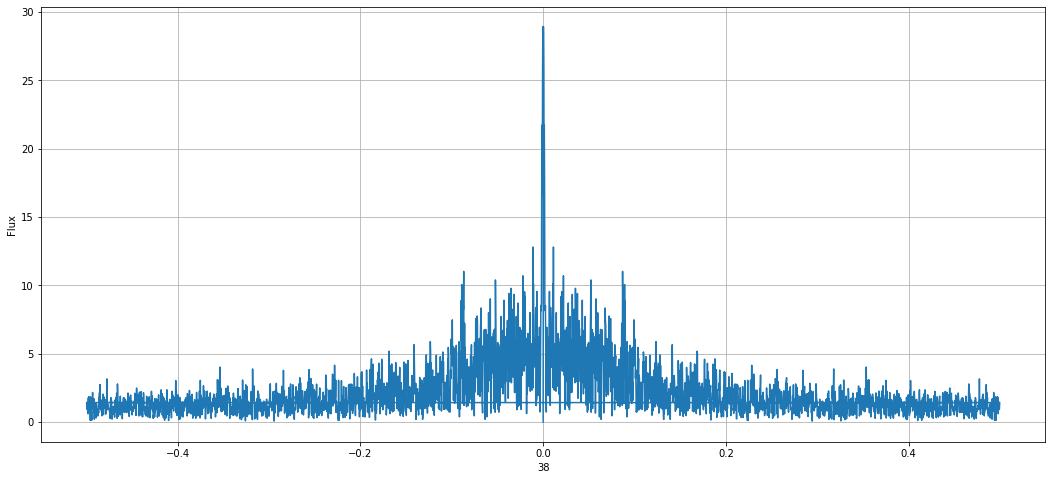

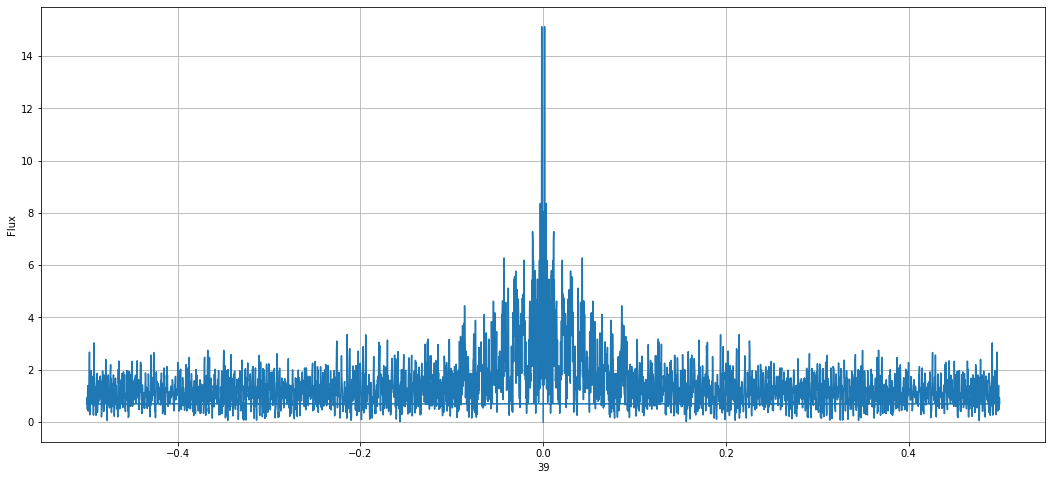

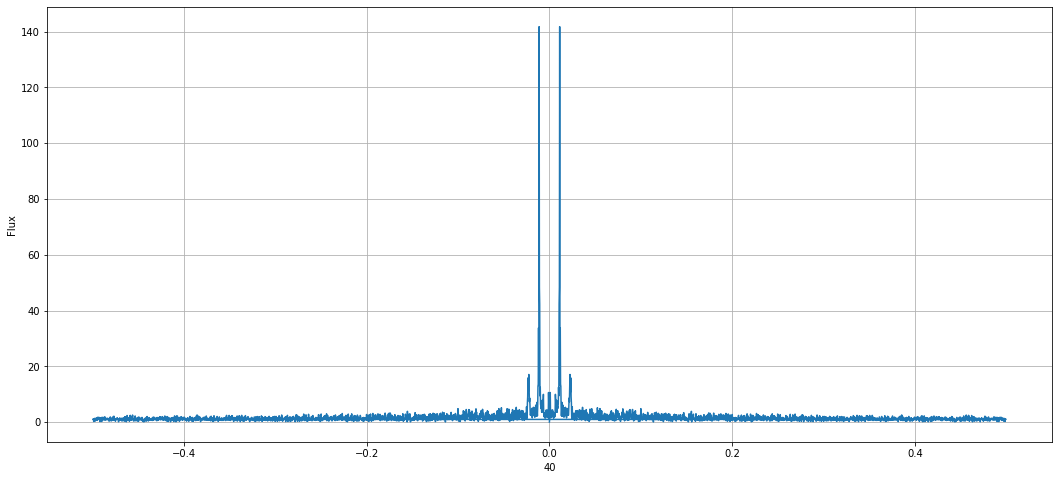

In [ ]:
# Create line plots for the transformed Pandas series for the stars 34 to 41 in the 'x_fft_train' DataFrame.
for i in range(34, 41):
  plt.figure(figsize = (18,8))
  plt.xlabel(str(i))
  plt.ylabel("Flux")
  plt.plot(f1, x_train_fft.iloc[i] )
  plt.grid()
  plt.show()

The prediction model later, when deployed, should look for the different frequency pattern for different stars. Based on these patterns, it should classify whether a star has a planet or not.

Now, you apply the `fast_fourier_transform()` function on the `norm_test_df` `FLUX` values only. Before and after applying this function, take the transpose of the DataFrame.

In [ ]:
# Apply the 'fast_fourier_transform()' function on the transposed 'norm_test_df' DataFrame.
x_test_T = norm_test_df.iloc[:,1:].T.apply(fftr)
x_test_fft = x_test_T.T
x_test_fft.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,FLUX.11,FLUX.12,FLUX.13,FLUX.14,FLUX.15,FLUX.16,FLUX.17,FLUX.18,FLUX.19,FLUX.20,FLUX.21,FLUX.22,FLUX.23,FLUX.24,FLUX.25,FLUX.26,FLUX.27,FLUX.28,FLUX.29,FLUX.30,FLUX.31,FLUX.32,FLUX.33,FLUX.34,FLUX.35,FLUX.36,FLUX.37,FLUX.38,FLUX.39,FLUX.40,...,FLUX.3158,FLUX.3159,FLUX.3160,FLUX.3161,FLUX.3162,FLUX.3163,FLUX.3164,FLUX.3165,FLUX.3166,FLUX.3167,FLUX.3168,FLUX.3169,FLUX.3170,FLUX.3171,FLUX.3172,FLUX.3173,FLUX.3174,FLUX.3175,FLUX.3176,FLUX.3177,FLUX.3178,FLUX.3179,FLUX.3180,FLUX.3181,FLUX.3182,FLUX.3183,FLUX.3184,FLUX.3185,FLUX.3186,FLUX.3187,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,5.126298e-15,23.184733,40.545472,17.994173,13.772498,16.594294,17.532422,8.094149,8.045917,9.549431,7.981027,5.287100,12.370191,8.395335,8.553800,4.309482,7.490986,10.080278,8.053845,4.251019,4.045196,4.938889,4.448891,6.867339,8.095095,3.053256,8.820256,7.712783,10.136966,8.355963,5.958016,9.640472,10.699294,6.819834,8.876643,6.950734,4.831057,5.636601,1.145892,6.599601,...,5.130651,6.599601,1.145892,5.636601,4.831057,6.950734,8.876643,6.819834,10.699294,9.640472,5.958016,8.355963,10.136966,7.712783,8.820256,3.053256,8.095095,6.867339,4.448891,4.938889,4.045196,4.251019,8.053845,10.080278,7.490986,4.309482,8.553800,8.395335,12.370191,5.287100,7.981027,9.549431,8.045917,8.094149,17.532422,16.594294,13.772498,17.994173,40.545472,23.184733
1,3.980211e-14,135.637702,42.680618,28.017660,17.672923,16.099550,62.999485,27.005547,26.735149,29.708628,9.883983,34.277524,72.281651,24.528767,4.534815,12.675589,15.834146,18.067399,13.654873,13.552821,21.800119,9.411672,0.903089,4.953368,4.798063,15.421308,8.244732,13.001946,4.563079,6.663124,1.724316,21.652624,15.739841,15.593781,5.901540,14.276665,11.181695,3.118744,8.458737,15.851903,...,23.188351,15.851903,8.458737,3.118744,11.181695,14.276665,5.901540,15.593781,15.739841,21.652624,1.724316,6.663124,4.563079,13.001946,8.244732,15.421308,4.798063,4.953368,0.903089,9.411672,21.800119,13.552821,13.654873,18.067399,15.834146,12.675589,4.534815,24.528767,72.281651,34.277524,9.883983,29.708628,26.735149,27.005547,62.999485,16.099550,17.672923,28.017660,42.680618,135.637702
2,2.581991e-14,101.624620,26.553454,11.634754,11.720122,46.153088,23.677302,22.208643,14.393021,3.278532,7.742408,9.010245,11.050290,15.234191,14.793277,7.146753,9.825702,4.178862,17.689056,5.301253,0.838855,5.453207,8.119005,6.874388,4.943019,4.889046,9.891267,2.335758,0.634175,9.118097,10.735174,15.531430,17.775452,5.374194,13.646464,2.894904,5.909334,6.081466,17.896810,5.259022,...,2.926198,5.259022,17.896810,6.081466,5.909334,2.894904,13.646464,5.374194,17.775452,15.531430,10.735174,9.118097,0.634175,2.335758,9.891267,4.889046,4.943019,6.874388,8.119005,5.453207,0.838855,5.301253,17.689056,4.178862,9.825702,7.146753,14.793277,15.234191,11.050290,9.010245,7.742408,3.278532,14.393021,22.208643,23.677302,46.153088,11.720122,11.634754,26.553454,101.624620
3,4.574132e-14,37.305651,20.537365,5.108229,16.309293,20.286675,18.969927,6.010526,8.763040,6.370417,16.668561,18.211277,3.796749,14.614066,12.865043,15.193305,4.960198,4.656041,5.049559,20.808633,19.072745,17.983037,55.100406,7.533258,3.688735,9.832614,2.530170,2.220069,6.144516,2.746874,6.569176,16.597156,11.903331,4.207380,7.016571,6.786262,14.311839,7.601058,3.766341,15.346786,...,3.619052,15.346786,3.766341,7.601058,14.311839,6.786262,7.016571,4.207380,11.903331,16.597156,6.569176,2.746874,6.144516,2.220069,2.530170,9.832614,3.688735,7.533258,55.100406,17.983037,19.072745,20.808633,5.049559,4.656041,4.960198,15.193305,12.865043,14.614066,3.796749,18.211277,16.668561,6.370417,8.763040,6.010526,18.969927,20.286675,16.309293,5.108229,20.537365,37.305651
4,2.879381e-14,7.138386,11.941614,12.808132,27.841397,39.681676,17.985758,30.233859,14.800046,8.501530,5.167375,6.483161,7.324964,6.815963,5.151272,11.916397,16.422263,15.649583,10.678073,8.039292,5.185997,1.507619,1.

Now, you create the line plots for the stars in the rows `3 to 7`  in the transformed test DataFrame. Also, label the $x-axis$ with the row number.

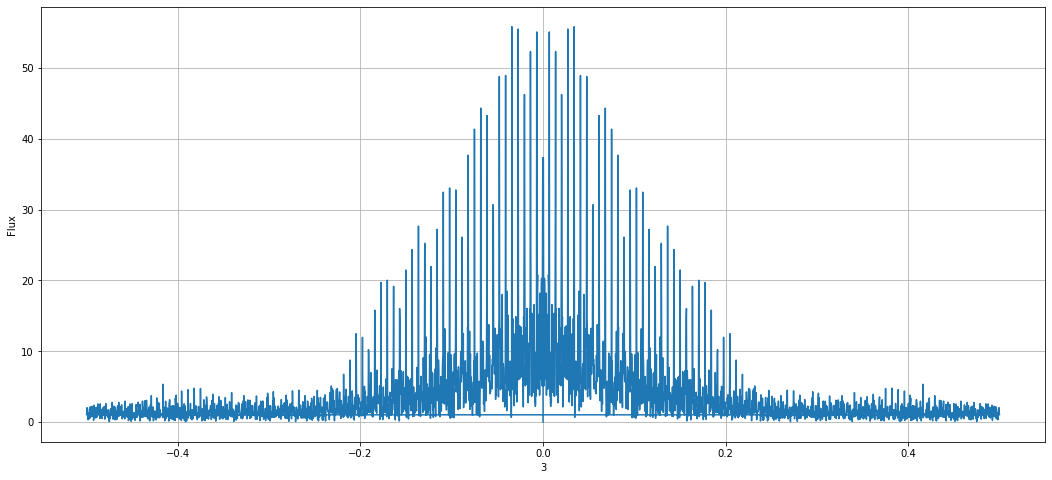

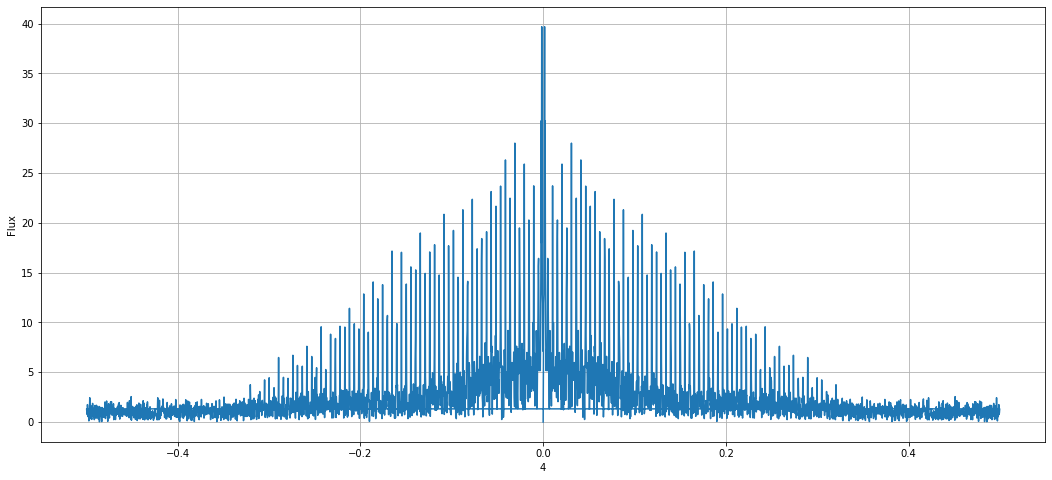

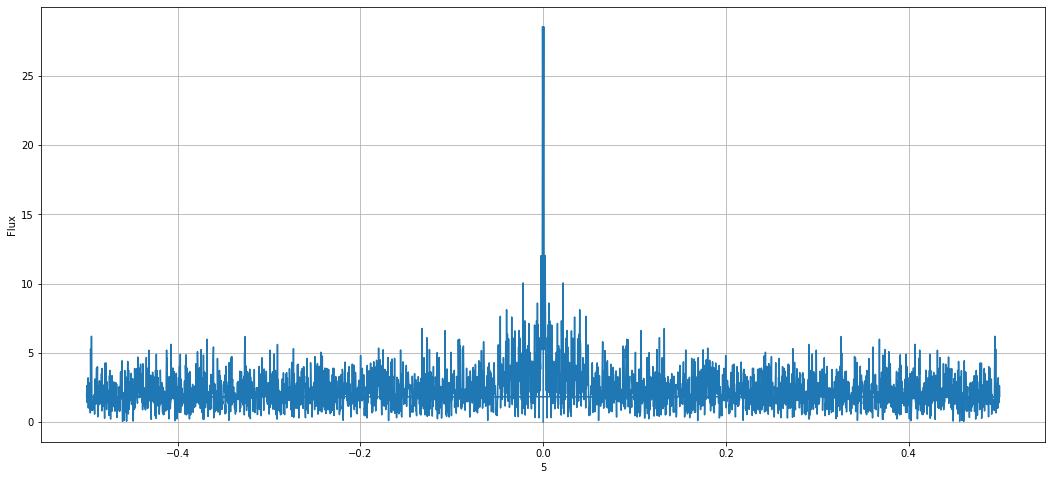

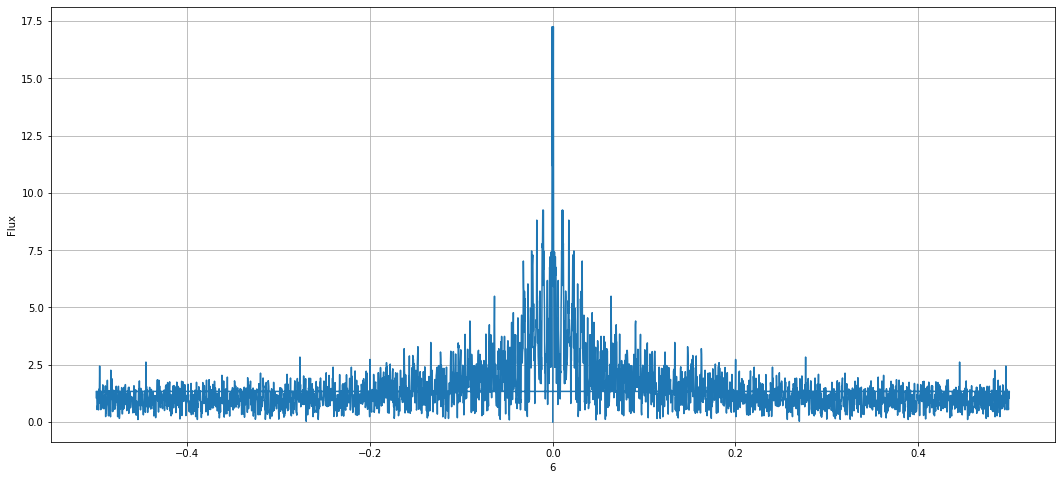

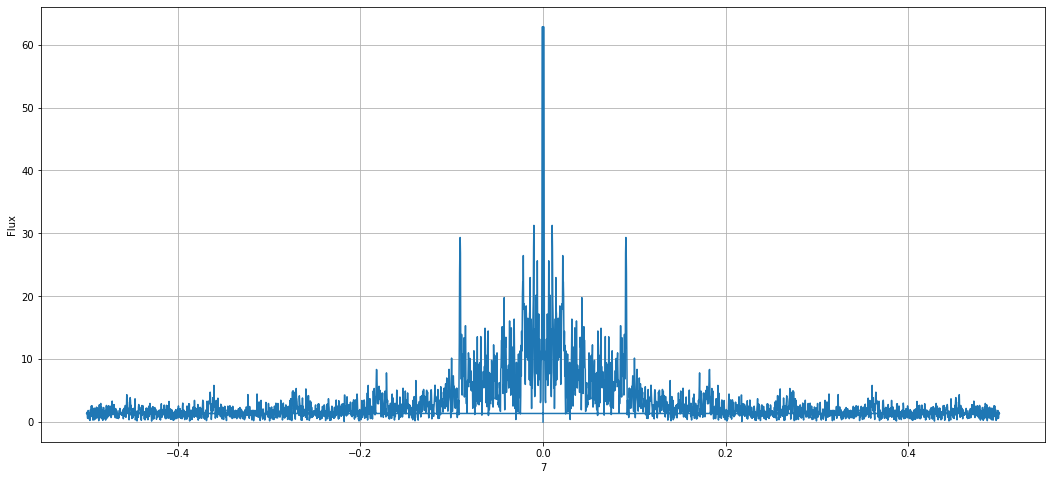

In [ ]:
# Plot the line plots for the stars in the rows '3' to '7'  in the transformed test DataFrame.
for i in range(3,8):
  plt.figure(figsize = (18,8))
  plt.xlabel(str(i))
  plt.ylabel("Flux")
  plt.plot(f1, x_test_fft.iloc[i] )
  plt.grid()
  plt.show()

Now that we have applied Fourier transformation, our prediction model should be able to recognise the different frequency patterns for different stars and hopefully should be able to classify the stars correctly as required.

In the next class, we will how to manually synthesize data to have the equal number of class `1` and class `2` values in the `exo_train_df` DataFrame. Right now there are only 37 class `2` and 5050 class 1 values because of which the `exo_train_df` DataFrame is highly imbalanced.

---